In [ ]:
#Observations
#1 the majority of mice that have been selected by the random selecter 
# seem to have had great responses from the top 4 drug regimens 
#2 there were not as many outliers as I would have imagined. This leads me 
# to believe that the information provided can be heavily trusted. 
#3 I am surprised that the tumor volume and mouse rate were so closely 
#correlated. I would assume that the 'sicker' the mouse got the less weight the 
#mouse would be, but apparently the tumors were adding a significant amount of 
#weight themselves. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import random as random
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mousedata = pd.read_csv('Resources/mouse_metadata.csv')
results = pd.read_csv('Resources/study_results.csv')

# Display the data table for preview

In [2]:
# Combine the data into a single dataset
df = pd.merge(mousedata, results, on = 'Mouse ID')

In [3]:
#dropping duplicate rows 
df.drop_duplicates(keep = False, inplace = True)

In [4]:
df = pd.DataFrame(df)
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# grouping by drugnames 
druggp = df.groupby('Drug Regimen')
druggp.mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,13.456522,19.965217,21.565217,40.675741,0.713043
Ceftamin,13.247191,27.398876,19.747191,52.591172,1.179775
Infubinol,16.230337,27.196629,18.174157,52.884795,0.960674
Ketapril,15.659574,27.861702,19.707447,55.235638,1.297872
Naftisol,12.000000,27.166667,19.623656,54.331565,1.182796
Placebo,10.734807,27.928177,18.674033,54.033581,1.441989
Propriva,10.767296,27.056604,17.075472,52.414660,0.987421
Ramicane,10.684211,19.679825,21.425439,40.216745,0.548246
Stelasyn,12.784530,27.856354,19.226519,54.233149,0.872928


In [6]:
#creating data frame for mean, median, variance, std dev, SEM
tumordf = pd.DataFrame({
    'Mean' : druggp['Tumor Volume (mm3)'].mean(),
    'Median' : druggp['Tumor Volume (mm3)'].median(),
    'Variance' : druggp['Tumor Volume (mm3)'].var(),
    'Standard Deviation' : druggp['Tumor Volume (mm3)'].std(),
    'SEM' : druggp['Tumor Volume (mm3)'].sem()
})
tumordf

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
drugcount = druggp.count()
drugcount

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,159,159,159,159,159,159,159
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


<AxesSubplot:title={'center':'Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoints'>

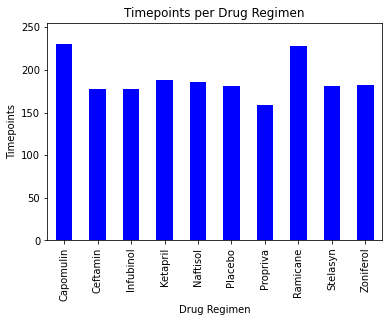

In [8]:
#pandas plot drug vs timepoint
drugcount.reset_index().plot(kind = 'bar', x = 'Drug Regimen', y = 'Timepoint', color = 'blue', ylabel = 'Timepoints', 
                             title = 'Timepoints per Drug Regimen', legend = False, ylim = (0,drugcount['Timepoint'].max() + 25),)


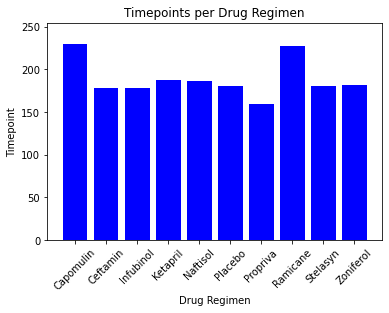

In [9]:
#matplotlib drug vs timepoint
plt.bar(drugcount.reset_index()['Drug Regimen'],drugcount['Timepoint'],color = 'blue'),
plt.xticks(rotation = 45),
plt.xlabel('Drug Regimen'),
plt.ylabel('Timepoint'),
plt.title('Timepoints per Drug Regimen'),
plt.ylim(0,drugcount['Timepoint'].max() + 25)
plt.show()

In [10]:
#gathering numbers of male and female mice
sxfemale = df.loc[df['Sex']=='Female'].count()
sxfemale = sxfemale['Sex']
sxmale = df.loc[df['Sex']=='Male'].count()
sxmale = sxmale['Sex']
#gathering percentages
sxmaleper = sxmale/(sxmale+sxfemale)
sxfemaleper = sxfemale/(sxmale+sxfemale)
#format to percent 
sxmaleper = '{:.2%}'.format(sxmaleper)
sxfemaleper = '{:.2%}'.format(sxfemaleper)
print(sxmaleper, sxfemaleper)

50.66% 49.34%


<AxesSubplot:title={'center':'Male vs Female Mice'}, ylabel=' '>

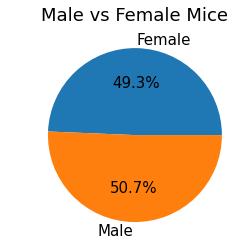

In [26]:
#pandas pie of male vs female mice 
sxplot = df.groupby(['Sex']).count()
sxplot.plot(kind = 'pie', y='Mouse ID', legend = False, title = 'Male vs Female Mice', ylabel = " ", 
            autopct = '%1.1f%%', fontsize = 15)

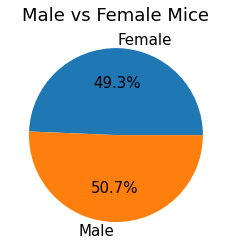

In [27]:
#pandas pie of male vs female mice 
sxplot2 = [sxfemale, sxmale]
labels = ['Female','Male']
plt.title('Male vs Female Mice')
plt.pie(sxplot2, labels = labels, autopct = '%1.1f%%')
font = {'size':15}
plt.rc('font', **font)
plt.show()

In [28]:
#organize and group top 4 drug regimens into their own data frames
top4 = df.groupby(by = ['Drug Regimen','Mouse ID']).last()
top4index = top4.index.to_list()
#removing all other drug regimens 
top4.drop(['Ketapril','Naftisol','Placebo','Propriva','Stelasyn','Zoniferol'], inplace = True)
#creating individual data frames
capomulin = top4.loc['Capomulin',:]
ramicane = top4.loc['Ramicane',:]
infubinol = top4.loc['Infubinol',:]
ceftamin = top4.loc['Ceftamin',:]
#cleaning data to only include tumor volume 
capomulindf = pd.DataFrame(capomulin['Tumor Volume (mm3)'])
ramicanedf = pd.DataFrame(ramicane['Tumor Volume (mm3)'])
infubinoldf = pd.DataFrame(infubinol['Tumor Volume (mm3)'])
ceftamindf = pd.DataFrame(ceftamin['Tumor Volume (mm3)'])

In [29]:
#calculating the Quartiles and IQR
#quartiles
capomulinq = capomulindf.quantile([.25, .5, .75])
ramicaneq = ramicanedf.quantile([.25, .5, .75])
infubinolq = infubinoldf.quantile([.25, .5, .75])
ceftaminq = ceftamindf.quantile([.25, .5, .75])
#lower quartiles
capomulinlow = capomulindf.quantile(.25)
ramicanelow = ramicanedf.quantile(.25)
infubinollow = infubinoldf.quantile(.25)
ceftaminlow = ceftamindf.quantile(.25)
#higher quartiles
capomulinhigh = capomulindf.quantile(.75)
ramicaneqhigh = ramicanedf.quantile(.75)
infubinolqhigh = infubinoldf.quantile(.75)
ceftaminqhigh = ceftamindf.quantile(.75)
#IQR's 
capomuliniqr = capomulinhigh - capomulinlow
ramicaneiqr = ramicanelow - ramicaneqhigh
infubinoliqr = infubinollow - infubinolqhigh
ceftaminiqr = ceftaminlow - ceftaminqhigh
#making all dataframes
capomulinq = pd.DataFrame(capomulinq)
ramicaneq = pd.DataFrame(ramicaneq)
infubinolq = pd.DataFrame(infubinolq)
ceftaminq = pd.DataFrame(ceftaminq)
#create dataframe for iqr's to add to iqrdf
iqrs = pd.DataFrame({
    'Tumor Volume (mm3) Capomulin': [capomuliniqr[0]],
    'Tumor Volume (mm3) Ramicane' : [ramicaneiqr[0]],
    'Tumor Volume (mm3) Infubinol' : [capomuliniqr[0]],
    'Tumor Volume (mm3) Ceftamin' : [capomuliniqr[0]],
},index = ['IQR'])

#joining all DataFrames
iqrdf = capomulinq.join(ramicaneq,lsuffix = ' Capomulin',rsuffix = ' Ramicane')
iqrdf = iqrdf.join(infubinolq, rsuffix = ' Infubinol')
iqrdf.rename(columns = {'Tumor Volume (mm3)':'Tumor Volume (mm3) Infubinol'},inplace = True)
iqrdf = iqrdf.join(ceftaminq, rsuffix = ' Ceftamin')
iqrdf.rename(columns = {'Tumor Volume (mm3)':'Tumor Volume (mm3) Ceftamin'},inplace = True)
iqrdf.join(iqrs,rsuffix = " ")

iqrdf = iqrdf.append(iqrs)


iqrdf

,Tumor Volume (mm3) Capomulin,Tumor Volume (mm3) Ramicane,Tumor Volume (mm3) Infubinol,Tumor Volume (mm3) Ceftamin
0.25,32.377357,31.560470,54.048608,48.722078
0.5,38.125164,36.561652,60.165180,59.851956
0.75,40.159220,40.659006,65.525743,64.299830
IQR,7.781863,-9.098537,7.781863,7.781863


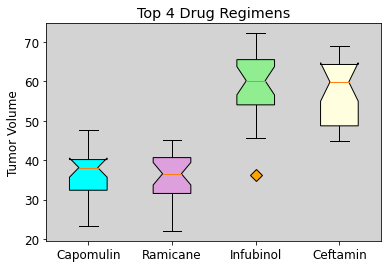

In [30]:
outcolor = dict(markerfacecolor='orange', marker='D', markersize='8')
boxdata = [capomulin['Tumor Volume (mm3)'],ramicane['Tumor Volume (mm3)'],
           infubinol['Tumor Volume (mm3)'],ceftamin['Tumor Volume (mm3)']]
font = {'size':12}
plt.rc('font', **font)

fig, ax1 = plt.subplots()
ax1.set_title('Top 4 Drug Regimens')
ax1.set_ylabel('Tumor Volume')
boxlabels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
bxplot = ax1.boxplot(boxdata, flierprops = outcolor, labels = boxlabels, notch = True, patch_artist=True)
ax1.set_facecolor('lightgrey')

# fill with colors
colors = ['cyan', 'plum', 'lightgreen', 'lightyellow']
for bplot in (bxplot):
    for patch, color in zip(bxplot['boxes'], colors):
        patch.set_facecolor(color)
plt.show()

In [41]:
#randomly selecting a mouse that has been treated with capomulin
mousetestid = capomulin.sample(1).index
mousetestid = pd.DataFrame(mousetestid)
mousetestid

,Mouse ID
0,m601


In [42]:
#using the Randomly selected mouse id to form a dataframe
mousetestdata = df.iloc[np.where(df["Mouse ID"].isin(mousetestid['Mouse ID']))]
mousetestdata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


In [43]:
#creating smaller data frames for the tumor vol and timepoint for our test mouse  
mousetv = mousetestdata['Tumor Volume (mm3)']
mousetv = pd.DataFrame(mousetv)
mousetp = mousetestdata['Timepoint']
mousetp = pd.DataFrame(mousetp)

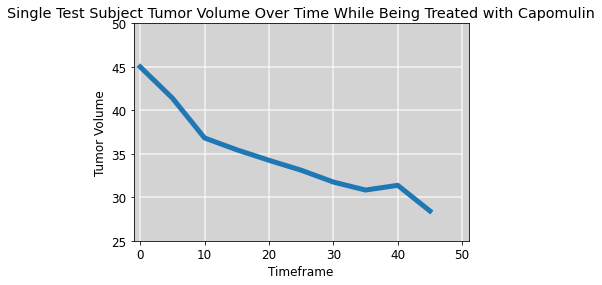

In [44]:
#creating and Formating plot
fig, ax3 = plt.subplots()
ax3.set_facecolor('lightgrey')
plt.xlabel('Timeframe')
plt.ylabel('Tumor Volume')
plt.hlines([30,35,40,45],0,50, alpha=.75, color='white')
plt.vlines([0,10,20,30,40,50],0,50, alpha=.75, color='white')
plt.ylim(25,50)
plt.xlim(-1,51)
plt.title('Single Test Subject Tumor Volume Over Time While Being Treated with Capomulin')
plt.plot(mousetp, mousetv, linewidth = 5)


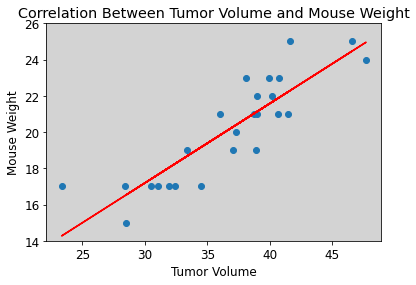

In [35]:
#gathering total volume and weight for scatterplot
#Data Values
captv = capomulin['Tumor Volume (mm3)']
capmw = capomulin['Weight (g)']
#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(captv,capmw)
regress_values = captv * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#formatting scatter plot
fig, ax4 = plt.subplots()
ax4.set_facecolor('lightgrey')
plt.scatter(captv,capmw)
plt.plot(captv,regress_values,'r-')
plt.xlabel('Tumor Volume')
plt.ylabel('Mouse Weight')
plt.ylim(14,26)
plt.title("Correlation Between Tumor Volume and Mouse Weight")
plt.show()